# Health Burden
See the `README.md` file for a detailed description of the data source and variables.

## Set up

In [22]:
# Read in data (this is done for you)
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook') # enable notebook rendering

# Load the data
data = pd.read_csv('./data/prepped/risk-data.csv')

## Data Structure
To get a basic sense of your dataset, check the following:

- What is the size of the dataset (rows, columns)?
- How many countries are present in the dataset?
- What are the age-groups in the dataset?
- What are the variables (columns) present in the dataset?
- What is the data type of each variable?
- What are the summary statistics of each quantitative variable (_hint: `describe()`_)

Note the **count** for each column, and investigate why these may be inconsistent.

In [23]:
#size
size = data.shape

#unique countries
unique_country=data['country'].nunique()


#age group values
agedf = pd.DataFrame(data,columns=['age']).drop_duplicates()
print("printing agedf", agedf)

#columns
columns = list(data.columns.values)
#column = data.iloc[:,0:-1]

#rows
rows = data.iloc[0:-1]

#data type of each variable
df = pd.DataFrame(data)
datatype = df.dtypes
for a in df.columns:
    print(a, df[a].dtype)


#summary stats
summary_stats = data.describe()

printing agedf            age
0    70+ years
1  50-69 years
2      Under 5
3   5-14 years
4  15-49 years
country object
country_code object
super_region object
region object
sex object
age object
pop float64
alcohol_use float64
drug_use float64
high_meat float64
low_exercise float64
smoking float64


## Univariate Analysis
To explore the distribution of each risk-column in a visual way, create a histogram of each risk-column of interest (e.g., `alcohol_use`, `drug_use`, etc.). For easier comparisons, you may want to store each histogram in a variable, then render all of the charts in the same row as shown [here](https://altair-viz.github.io/user_guide/compound_charts.html?highlight=repeat#vertical-concatenation).


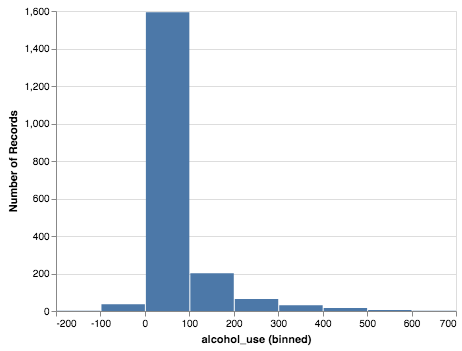

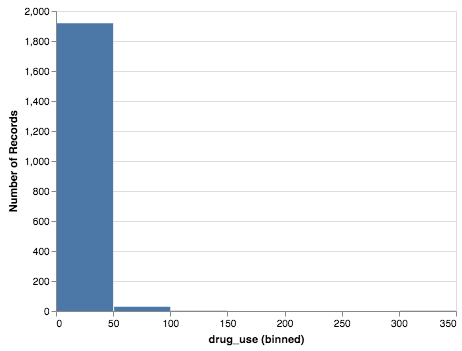

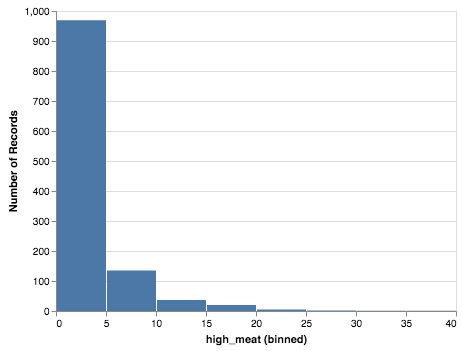

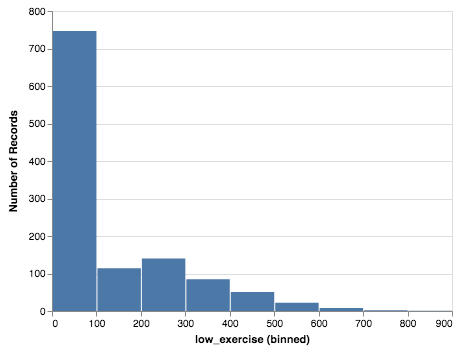

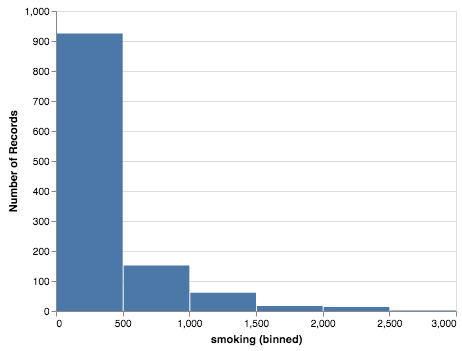

In [25]:
# Code goes here
hist1=alt.Chart(data).mark_bar().encode(
    alt.X('alcohol_use:Q', bin=True),
    y='count(*):Q',
)
hist1.display()

hist2=alt.Chart(data).mark_bar().encode(
    alt.X('drug_use:Q', bin=True),
    y='count(*):Q',
)
hist2.display()

hist3=alt.Chart(data).mark_bar().encode(
    alt.X('high_meat:Q', bin=True),
    y='count(*):Q',
)
hist3.display()

hist4=alt.Chart(data).mark_bar().encode(
    alt.X('low_exercise:Q', bin=True),
    y='count(*):Q',
)
hist4.display()

hist5=alt.Chart(data).mark_bar().encode(
    alt.X('smoking:Q', bin=True),
    y='count(*):Q',
)
hist5.display()

_list some observations from your histograms here using Markdown code_:

- Smoking and low exercise both have similar risks of deaths
- Deaths from alcohol use seem to be more prominent than deaths by drug use


## Univariate analysis (by age)
In this section, you should **write a function** to investigate how a given risk (column) varies by **age group** (the risk -- column name -- will be the argument to your function). More specifically, the function should create a set of histograms (one for each age-group) to show the distribution of death rates for a given risk factor (e.g., 5 histograms -- one for each age group -- showing the distribution of the `alcohol_use` death rate).

The easiest way to do this will be to use **faceting** (see the _second example_ in this [documentation](https://altair-viz.github.io/user_guide/compound_charts.html#faceted-charts). 

Make sure to **include a docstring** to describe your function.

In [35]:
# Write your function here

'''This function takes in a risk and returns a scatter plot with the age being the independent variable'''
def getFacetChartrisk(risk):

    ystr="alcohol_use"+":Q"
    facetchartrisk=alt.Chart(df).mark_point().encode(
    x='age:N',
    y=ystr,
    color='age:N'
    ).properties(
    width=180,
    height=180
    ).facet(
    column='age:N'
    )
    return facetchartrisk


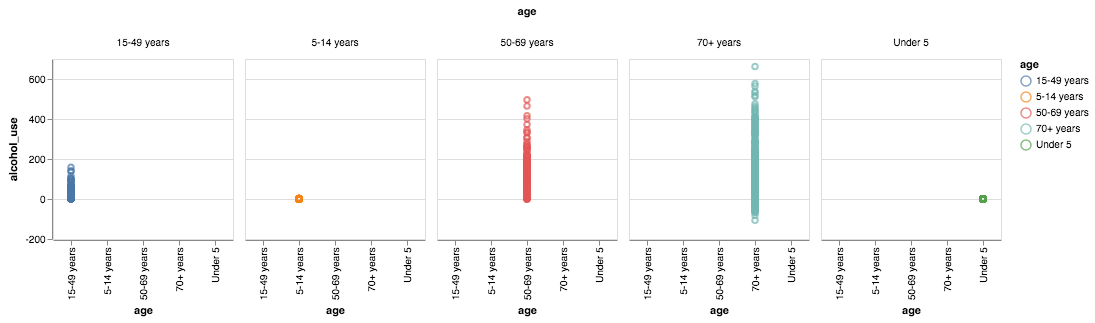

In [34]:
# Demonstrate that your function works by passing a risk factor (e.g., `drug_use`) as an argument to the function.
riskchart=getFacetChartrisk("alcohol_use")
riskchart.display()

_list some observations from your histograms here using Markdown code_:

- Alcohol use seems to affect more people in the 50-69 year age range.
- There is a small population of deaths by alcohol use for those between 5-14.



## Univariate analysis (by sex)
In this section, you should investigate how a given risk (column) varies by **sex**. To do this, **write a function** to create a single histogram with _overlapping distributions_ for males and females (for a given risk factor). Again, the argument to your function will be a column name. 

Make sure to include a **docstring**. 

_Hint_: turn down the _alpha_ (opacity) to help reduce occlusion in the chart. 

In [28]:
# Write your function here

'''This function takes in a risk and returns a scatter plot based on gender as the independent variable'''
def getFacetChartSex(risk):

    ystr="alcohol_use"+":Q"
    getFacetChartSex=alt.Chart(df).mark_point().encode(
    x='sex:N',
    y=ystr,
    color='sex:N'
    ).properties(
    width=180,
    height=180
    ).facet(
    column='sex:N'
    )
    return getFacetChartSex



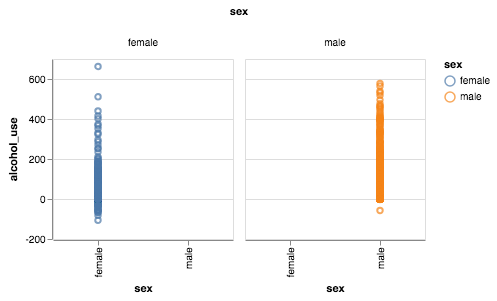

In [32]:
# Demonstrate that your function works!
getFacetChartSex('alcohol_use')

_list some observations from your histograms here using Markdown code_:

- Alcohol usage seems to negatively affect men more than women due to the number of deaths
- Women have a wider range of deaths by alcohol than men do. 


## Bivariate analysis
As a final step, create a **scatterplot matrix** of all of your risks to visually assess the correlation across death rates. Hint: see [documentation](https://altair-viz.github.io/gallery/scatter_matrix.html?highlight=scatter%20matrix).

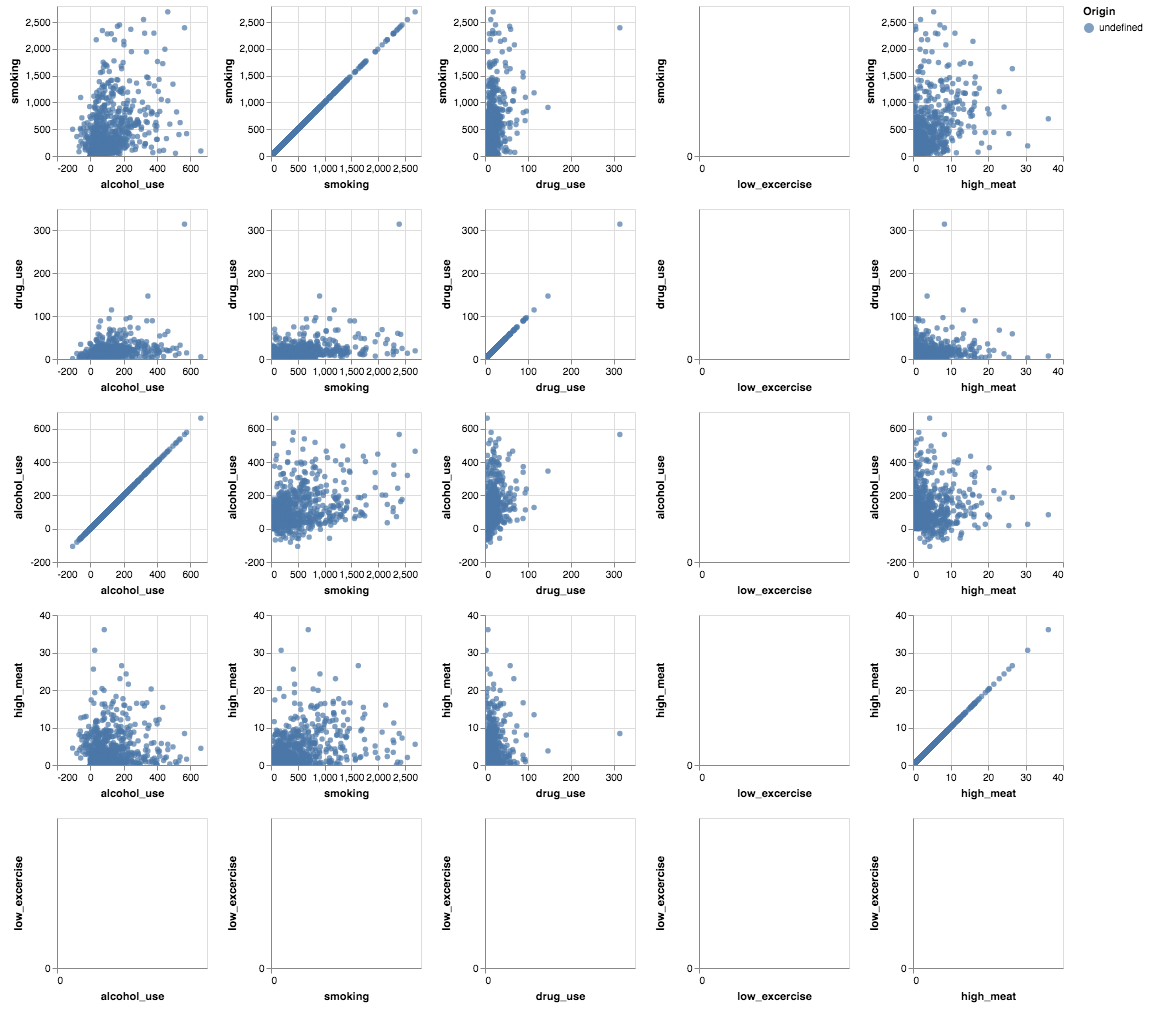

In [30]:
# Code goes here
chart=alt.Chart(data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['smoking', 'drug_use', 'alcohol_use','high_meat','low_excercise'],
    column=['alcohol_use', 'smoking', 'drug_use','low_excercise','high_meat']
).interactive()
chart.display()

_list some observations from your scatterplot matrix here using Markdown code_:

- There seems to be a strong correlation between alcohol use and drug use.
